本笔记是《从零构建大模型》的附录A：PyTorch简介的内容总结和补充。


# 1. 什么是PyTorch


## 1.1 PyTorch的三大核心组件
PyTorch的三大核心组件包括：
1. 张量库（Tensor Lib）：扩展了NumPy的计算基础模块
2. 自动微分引擎（Autograd Engine）：作为模型优化的自动微分引擎
3. 深度学习库（DL Lib）：提供神经网络构建块、损失函数以及优化器等工具

## 1.2 定义深度学习
深度学习专注于实现深度神经网络（深度是指具有多层有关数据特征的表现层），是机器学习的一个子集，而机器学习也只是人工智能的子集。

## 1.3 安装PyTorch
PyTorch有两个版本：
1. 仅支持CPU计算的精简版
2. 同时支持GPU和CPU计算的完整版

查看PyTorch的版本：

In [1]:
import torch
torch.__version__

'2.6.0'


安装了PyTorch之后，检查安装是否是别了内置的NVDIA GPU：

In [2]:
import torch
torch.cuda.is_available()

False

如果是在Apple Silicon芯片下安装的，可以检查是否支持加速运行：

In [3]:
import torch
torch.backends.mps.is_available()

True

# 2. 理解张量

在数学上，张量是一个将标量、向量和矩阵推广到更高维度的概念，它可以通过阶数（又称为秩）来表示，例如，标量是秩为0的张量，向量是1阶张量，矩阵是2阶张量。

从计算的角度来看，张量是一种数据容器，可以看做是高维数组。PyTorch中的张量类似于NumPy的NDarray，甚至连大部分API都兼容NumPy数组，但额外为深度学习添加了诸如自动微分的重要功能。

## 2.1 标量，向量，矩阵和张量

In [7]:
tensor_0d = torch.tensor(1)
tensor_0d

tensor(1)

In [8]:
tensor_1d = torch.tensor([1, 2, 3])
tensor_1d

tensor([1, 2, 3])

In [9]:
tensor_2d = torch.tensor([[1, 2], [3, 4]])
tensor_2d

tensor([[1, 2],
        [3, 4]])

In [10]:
tensor_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
tensor_3d

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

## 2.2 张量的数据类型


In [13]:
tensor_1d.dtype

torch.int64

In [14]:
tensor_float = torch.tensor([1.0, 2.0, 3.0])
tensor_float.dtype

torch.float32

## 2.3 常见的张量操作

常见的张量操作如下：
1. 创建张量：`torch.tensor([...])`
2. 查看张量的形状：`torch.Tensor.dtype`
3. 改变张量的形状：`torch.reshape(<new shape>)` or `torch.view(<new shape>)`
4. 张量的转置：`torch.Tensor.transpose` or `torch.Tensor.permute`
5. 张量的连续化：`torch.Tensor.is_contiguous` or `torch.Tensor.contiguous`
6. 张量的矩阵乘法：`torch.matmul` or `@`

创建张量：

In [208]:
tensor = torch.tensor([4, 5, 6])
print(f"type of tensor: {type(tensor)}")
print(f"tensor: {tensor}")

type of tensor: <class 'torch.Tensor'>
tensor: tensor([4, 5, 6])


查看张量的形状：

In [17]:
tensor_shape = tensor_3d.shape
print(f"tensor_shape's type: {type(tensor_shape)}")
print(f"tensor_shape: {tensor_shape}")

tensor_shape's type: <class 'torch.Size'>
tensor_shape: torch.Size([2, 2, 2])


改变张量的形状：

In [22]:
tensor_reshaped = tensor_3d.reshape(2, 4)
print(f"{tensor_reshaped.shape}")
print(tensor_reshaped)

torch.Size([2, 4])
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


In [23]:
tensor_view = tensor_3d.view(2, 4)
print(tensor_view.shape)
print(tensor_view)

torch.Size([2, 4])
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


可以看到，view和reshape方法是类似的，不过view要求tensor在内存上是连续的：

In [25]:
if tensor_3d.is_contiguous():
    print(f"tensor_3d is contiguous")
    new_tensor = tensor_3d.view(2, 4)
else:
    print(f"tensor_ds is not contiguous")
    new_tensor = tensor_3d.reshape(2, 4)

tensor_3d is contiguous


张量的转置：

In [27]:
tensor_2d_transposed = tensor_2d.T
tensor_2d_transposed

tensor([[1, 3],
        [2, 4]])

In [32]:
print(f"转置前的tensor_3d：\n{tensor_3d}")
tensor_3d_transposed = tensor_3d.transpose(1, 2)
print(f"转置后的tensor_3d：\n{tensor_3d_transposed}")

转置前的tensor_3d：
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
转置后的tensor_3d：
tensor([[[1, 3],
         [2, 4]],

        [[5, 7],
         [6, 8]]])


需要注意的是，转置后的张量往往不再是连续存储了的：

In [34]:
tensor_3d_transposed.is_contiguous()

False

In [35]:
tensor_2d_transposed.is_contiguous()

False

如果要让张量重新变为连续的，可以使用contiguous方法：

In [38]:
tensor_2d_transposed.contiguous().is_contiguous()

True

In [39]:
tensor_3d_transposed.contiguous().is_contiguous()

True

最后常用的张量操作就是矩阵乘法：

In [44]:
W_2d = torch.tensor([1., 2., 3., 4.]).view(2, 2)
X_2d = torch.tensor([2., 4., 6. ,8.]).view(2, 2)
Y_2d = W_2d @ X_2d
Y_2d

tensor([[14., 20.],
        [30., 44.]])

In [45]:
W_3d = torch.tensor([1., 2., 3., 4.]).view(1, 2, 2)
X_3d = torch.tensor([2., 4., 6. ,8.]).view(1, 2, 2)
Y_3d = W_3d @ X_3d
Y_3d

tensor([[[14., 20.],
         [30., 44.]]])

与“@”运算符等价的是matmul方法：

In [46]:
W_2d = torch.tensor([1., 2., 3., 4.]).view(2, 2)
X_2d = torch.tensor([2., 4., 6. ,8.]).view(2, 2)
Y_2d = torch.matmul(W_2d, X_2d)
Y_3d

tensor([[[14., 20.],
         [30., 44.]]])

# 3. 将模型视为计算图

首先，我们需要顶一个简单的神经网络作为需要展开为计算图的示例：

In [85]:
from torch import nn

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.FC = nn.Linear(1, 1, bias=True)
        self.ACT = torch.sigmoid

    def forward(self, x):
        y = self.FC(x)
        a = self.ACT(y)
        return a

model = SimpleNet()

# 创建示例输入（注意：需要 requires_grad=False 或者不设置，因为主要是看前向计算图）
example_input = torch.randn(1, 1)

# 执行前向传播
output = model(example_input)


## 3.1 使用ONNX可视化计算图

然后，我们还要下载安装用来可视化计算图的ONNX及其依赖：

In [75]:
!pip install --quiet onnx pydot

现在，就可以使用ONNX来可视化刚刚创建的那个示例网络了：

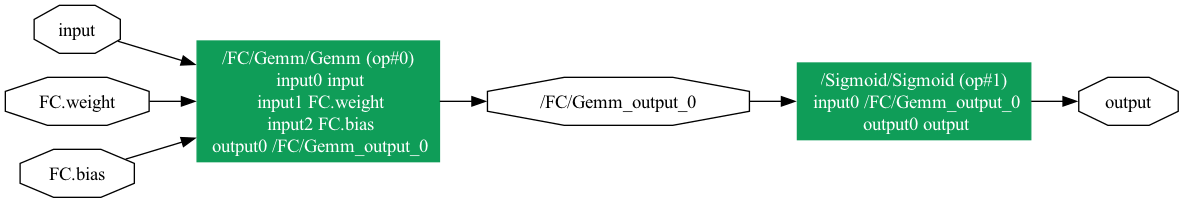

In [86]:
from IPython.display import Image
from onnx.tools.net_drawer import GetPydotGraph
import onnx

# 导出为ONNX
torch.onnx.export(
    model, 
    example_input, 
    "model.onnx", 
    input_names=['input'], 
    output_names=['output']
)

# 加载ONNX模型并可视化
onnx_model = onnx.load("model.onnx")
graph = GetPydotGraph(
    onnx_model.graph,
    name=onnx_model.graph.name
)
graph.write_png("onnx_graph.png")

# 打开刚刚的保存的计算图图片
Image(filename="onnx_graph.png")

## 3.2 使用TorchViz可视化计算图

In [211]:
!pip install --quiet torchviz

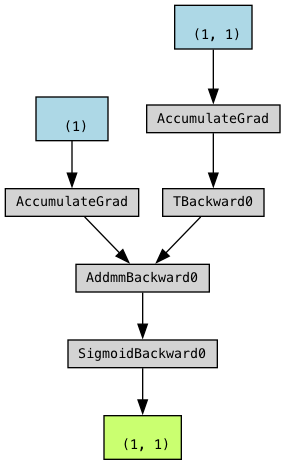

In [213]:
from torchviz import make_dot

# 生成计算图
# params 参数用于指定要在图中显示的模型参数（权重和偏置）
dot = make_dot(output, params=dict(model.named_parameters()))

# 保存计算图（默认为PDF格式，清晰且可缩放）
dot.render("simple_net_computational_graph", format="png", cleanup=True)  # cleanup=True 会删除中间生成的 .gv 文件

# 打开计算图图片
Image(filename="simple_net_computational_graph.png")

# 4. 轻松实现自动微分

让我们使用一个简单的逻辑回归分类器的前向传播作为计算图的示例：

![计算图](computional_graph.png)

In [107]:
import torch.nn.functional as F

t = torch.tensor([1.0])
x = torch.tensor([1.1])
# w和b都是可训练参数，如果不将他们的requires_grad参数设置为True，
# 就会出现异常：
# RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn
w = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
z = w * x + b
y = torch.sigmoid(z)
loss = F.binary_cross_entropy(y, t)

在计算图应用链式法则，计算损失函数对权重和偏置的偏导数：

![计算图上的链式法则](backprop.png)

使用PyTroch的autograd可以很方便地计算损失函数对可训练参数的偏导数，即梯度：

In [109]:
from torch.autograd import grad

grad_loss_w = grad(loss, w, retain_graph=True)
grad_loss_b = grad(loss, b, retain_graph=True)
print(f"grad_loss_w: {grad_loss_w}")
print(f"grad_loss_b: {grad_loss_b}")

grad_loss_w: (tensor([-0.0898]),)
grad_loss_b: (tensor([-0.0817]),)


更方便的做法就是直接在损失函数上调用backward方法，然后在可训练参数上查看对应的grad属性：

In [110]:
loss.backward()
print(f"w.grad: {w.grad}")
print(f"b.grad: {b.grad}")

w.grad: tensor([-0.0898])
b.grad: tensor([-0.0817])


# 5. 实现多层神经网络

## 5.1 定义网络

先定义一个具有两个隐藏层的神经网络：

In [114]:
class MLP(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        self.layers = torch.nn.Sequential(
            # 第一个隐藏层：
            nn.Linear(num_inputs, 30),
            nn.ReLU(),

            # 第二个隐藏层：
            nn.Linear(30, 20),
            nn.ReLU(),

            # 输出层：
            nn.Linear(20, num_outputs),
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits

实例化模型并浏览模型结构摘要：

In [115]:
model = MLP(50, 3)
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


## 5.2 查看模型参数

查看模型的可训练参数总数：

In [ ]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)  # numel: number of elements
print(f"Total nubmer of trainable model parameters: {num_params}")

Total nubmer of trainable model parameters: 2213


In [ ]:
ln1 = 50 * 30 + 30 # bias' shape: (1, 30)
ln2 = 30 * 20 + 20 # bias' shape: (1, 20)
ln3 = 20 * 3 + 3   # bias' shape: (1, 3)
total = ln1 + ln2 + ln3
assert total == num_params

另外，可以使用model的named_parameters方法来查各层的参数：

In [ ]:
layers = {} # dict of dict

for n, p in model.named_parameters():
    idx = int(n.split(".")[1])
    if not layers.get(idx):
        layers[idx] = {}
    layers[idx][n.split(".")[-1]] = p

for idx, params in layers.items():
    print(f"the {idx}th layer:")
    for k, v in params.items():
        print(f"{k}'s shape: {v.shape}")
    print("-" * 50)


the 0th layer:
weight's shape: torch.Size([30, 50])
bias's shape: torch.Size([30])
--------------------------------------------------
the 2th layer:
weight's shape: torch.Size([20, 30])
bias's shape: torch.Size([20])
--------------------------------------------------
the 4th layer:
weight's shape: torch.Size([3, 20])
bias's shape: torch.Size([3])
--------------------------------------------------


这里值得注意的地方就是，从打印出来的第0层参数“weight's shape: torch.Size([30, 50])”可以看到，该权重与我们定义网络的时候的不一样：“nn.Linear(50, 30)”，由此，可以初步认为在PyTorch的线性层中，输出是这样计算的：`output = input @ weight.T + bias`。

另一方面，网络各层的参数都是被随机初始化的，如果要确保每次实例化网络时都有相同的参数，可以：

In [137]:
torch.manual_seed(42)
model = MLP(50, 3)
model.layers[4].weight

Parameter containing:
tensor([[ 0.0044, -0.2130, -0.0503, -0.1085,  0.2190,  0.1592,  0.1668,  0.1531,
         -0.1386, -0.0960, -0.0875, -0.0896,  0.1741,  0.0760,  0.1792, -0.0105,
         -0.1993, -0.0649,  0.1571,  0.1361],
        [ 0.0692, -0.0656, -0.2087, -0.1201,  0.1166, -0.0902,  0.1070,  0.0611,
         -0.0859,  0.1362, -0.0719, -0.0074, -0.0852, -0.2121,  0.0361,  0.0646,
         -0.1126,  0.1372, -0.2006, -0.2156],
        [-0.1381, -0.0773, -0.0248, -0.0432,  0.1021, -0.1962,  0.0329,  0.0039,
          0.0591,  0.2223,  0.1376, -0.1238, -0.1832, -0.0541, -0.1122,  0.0781,
          0.0020,  0.1799,  0.0878, -0.0411]], requires_grad=True)

可以看到，重复运行上面的Block都会得到相同的输出。

## 5.3 前向传播

In [139]:
torch.manual_seed(42)
model = MLP(50, 3)
x = torch.randn((1, 50))  # batch size = 1
y = model(x)
assert y.shape == (x.shape[0], 3)
y

tensor([[ 0.1285, -0.0907, -0.0454]], grad_fn=<AddmmBackward0>)

这里，`grad_fn=<AddmmBackward0>`表示计算图中用于计算某个变量的最后一个函数。具体来说，`grad_fn=<AddmmBackward0>`意味着我们正在查看的张量是通过矩阵乘法和加法操作创建的。PyTorch会在反向传播期间使用这些信息来计算梯度。`grad_fn=<AddmmBackward0>`中的`<AddmmBackward0>`指定了执行的操作。在这种情况下，它执行的是一个Addmm操作。Addmm代表的是矩阵乘法(mm)后接加法(Add)的组合运算。

如果只想使用网络进行预测而不进行训练或反向传播（比如在训练之后使用它进行预测），那么为反向传播构建这个计算图可能会浪费资源，因为它会执行不必要的计算并消耗额外的内存。因此，当使用模型进行推理（比如做出预测）而不是训练时，最好的做法是使用torch.no_grad()上下文管理器。这会告诉PyTorch无须跟踪梯度，从而可以显著节省内存和计算资源：

In [140]:
with torch.no_grad():
    y = model(x)
y

tensor([[ 0.1285, -0.0907, -0.0454]])

PyTorch中，通常的做法是让模型返回最后一层的输出(logits)，而不将这些输出传递给非线性激活函数（例如二分类的sigmoid函数和多分类的softmax函数）。这是因为PyTorch常用的损失函数会将softmax（或二分类时的sigmoid）操作与负对数似然损失结合在一个类中。这样做是为了提高数值计算的效率和稳定性。因此，在训练代码中不需要手动添加softmax或者sigmoid等激活函数，但如果是想为预测结果计算类别成员概率，那么就需要显式调用softmax函数：

In [143]:
with torch.no_grad():
    y = model(x)
    z = torch.softmax(y, dim=1)
assert z.sum().item() == 1  # 三分类的预测概率之和为1
z

tensor([[0.3783, 0.3038, 0.3179]])

# 6. 设置高效的数据加载器

在PyTorch中创建数据加载器的主要思路如下图所示：

![构建数据加载器](building_data_loader.png)

## 6.1 创建数据集

In [148]:
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])
t_train = torch.tensor([0, 0, 0, 1, 1])

X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])
t_test = torch.tensor([0, 1])

In [147]:
from torch.utils.data import Dataset

class ToyDataset(Dataset):
    def __init__(self, x, t):
        self.features = x
        self.targets = t

    def __getitem__(self, index):
        """ 按索引返回数据集的单个样本 """
        feature = self.features[index]
        target = self.targets[index]
        return feature, target

    def __len__(self):
        return self.targets.shape[0]

In [149]:
train_ds = ToyDataset(X_train, t_train)
test_ds = ToyDataset(X_test, t_test)

## 6.2 创建数据加载器

In [151]:
random_seed = 42
batch_size = 2
num_workers = 0

torch.manual_seed(random_seed)

In [214]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers
)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=batch_size,
    shuffle=False,  # 测试数据无需打乱
    num_workers=num_workers
)

为什么需要打乱训练集的数据：
- 如果数据有特定顺序（如按类别排序），模型可能会"记住"这个顺序；
- 打乱确保每个batch都包含多样化的样本；
- 这有助于模型更好地泛化。

接下来，就可以迭代数据集了：

In [165]:
for idx, (x, t) in enumerate(train_loader):
    print(f"batch{idx}: \nx: {x}, \nt: {t}\n")

batch0: 
x: tensor([[ 2.3000, -1.1000],
        [ 2.7000, -1.5000]]), 
t: tensor([1, 1])

batch1: 
x: tensor([[-1.2000,  3.1000],
        [-0.9000,  2.9000]]), 
t: tensor([0, 0])

batch2: 
x: tensor([[-0.5000,  2.6000]]), 
t: tensor([0])



可以看到，每个训练样本（样例）正好都被访问了一次，这称为一个训练Epoch。

另外，在实际训练网络时，如果训练集中的最后一个批次的大小显著小于其他批次，那么就有可能会影响训练的收敛。所以，可以在实例化数据加载器的时候Enable drop_last：

In [ ]:
train_loader = DataLoader(
    dataset=train_ds,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,  
    drop_last=True
)

for idx, (x, t) in enumerate(train_loader):
    print(f"batch{idx}: \nx: {x}, \nt: {t}\n")

batch0: 
x: tensor([[ 2.7000, -1.5000],
        [-1.2000,  3.1000]]), 
t: tensor([1, 0])

batch1: 
x: tensor([[-0.9000,  2.9000],
        [-0.5000,  2.6000]]), 
t: tensor([0, 0])



最后，我们来讨论DataLoader中的num_workers=0设置。

这个参数在PyTorch的DataLoader函数中对于并行加载和预处理数据至关重要。当num_workers设置为0时，数据加载将在主进程而不是单独的工作进程中进行。这看起来似乎没有问题，但在使用GPU训练较大的网络时，这可能会导致模型训练显著减慢。这是因为CPU不仅要处理深度学习模型，还要花时间加载和预处理数据。因此，GPU在等待CPU完成这些任务时可能会闲置。相反，当num_workers设置为大于0的数值时，会启动多个工作进程并行加载数据，从而释放主进程专注于训练模型，并更好地利用系统资源。

然而，如果你处理的是非常小的数据集，那么可能并不需要将num_workers设置为1或更大的数值，因为总训练时间只需几秒。因此，如果你使用的是小型数据集或交互式环境（如Jupyter Notebook），那么增加num_workers可能不会显著提高速度，反而会导致一些问题。一个潜在的问题是，启动多个工作进程的开销可能会比实际数据加载所需的时间更长，尤其是数据集很小的时候。

此外，对于Jupyter Notebook，将num_workers设置为大于0有时可能会导致不同进程之间资源共享的问题，从而引发错误或导致笔记本崩溃。

因此，理解这种权衡并对num_workers参数进行合理设置是非常重要的。如果使用得当，这可以成为一个有益的工具，但应根据你的特定数据集大小和计算环境进行调整，以获得最佳效果。

根据书作者的经验，设置num_workers=4通常会在许多真实世界数据集上获得最佳性能，但最佳设置取决于你的硬件和用于加载Dataset类中训练示例的代码。

# 7. 典型的训练循环

## 7.1 训练

现在，让我们使用之前的训练数据来训练MLP。一个使用PyTorch的典型训练循环代码模板如下所示：

In [ ]:
import torch.nn.functional as F

torch.manual_seed(42)
num_epochs = 3

model = MLP(num_inputs=2, num_outputs=2)  # 之前的训练集有两个特征，两个类别
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)  # 优化器需要知道模型中的那些参数需要优化

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (x, t) in enumerate(train_loader):
        # 前向传播：
        y = model(x)  # logits = model(x)
        loss = F.cross_entropy(y, t)
        # 反向传播：
        optimizer.zero_grad()  # 将上一轮的梯度清0，以防止以外的梯度累积
        loss.backward()
        optimizer.step()
        # 打印日志：
        print(
            f"Epoch: {epoch:03d}/{num_epochs:03d} | "
            f"Batch {batch_idx:03d}/{len(train_loader):03d} | "
            f"Train Loss: {loss:.2f}"
        )
        # 插入可选地评测代码：
        model.eval()

Epoch: 000/003 | Batch 000/002 | Train Loss: 0.61
Epoch: 000/003 | Batch 001/002 | Train Loss: 0.35
Epoch: 001/003 | Batch 000/002 | Train Loss: 0.20
Epoch: 001/003 | Batch 001/002 | Train Loss: 0.08
Epoch: 002/003 | Batch 000/002 | Train Loss: 0.03
Epoch: 002/003 | Batch 001/002 | Train Loss: 0.01


我们引入了新的设置：model.train()和model.eval()。顾名思义，这些设置用于将模型置于训练模式或评估模式。这对于在训练和推断过程中具有不同行为的组件（如dropout或批归一化层）是必要的。

正如之前讨论的那样，我们直接将y传递给cross_entropy损失函数，后者会在内部应用softmax函数，以提高效率并增强数值稳定性。

接下来，调用loss.backward()会计算由PyTorch在后台构建的计算图中的梯度。optimizer.step()方法会利用这些梯度来更新模型参数以最小化损失。对SGD优化器而言，这意味着将梯度与学习率相乘，然后将缩放后的负梯度加到参数上。

注意　为了避免不必要的梯度累积，确保在每次更新中调用optimizer.zero_grad()来将梯度重置为0，这很重要。否则，梯度会逐渐累积起来，这往往是我们不愿意见到的。

## 7.2 预测

模型训练好之后，就可以用它来预测：

In [171]:
with torch.no_grad():
    y_train = model(X_train)
y_train

tensor([[ 2.5247, -2.3698],
        [ 2.3828, -2.2251],
        [ 2.1684, -2.0081],
        [-2.0328,  2.1993],
        [-2.4188,  2.5964]])

将预测的logits（即上面的y_train）转换为概率：

In [172]:
probs = torch.softmax(y_train, dim=-1)
probs

tensor([[0.9926, 0.0074],
        [0.9901, 0.0099],
        [0.9849, 0.0151],
        [0.0143, 0.9857],
        [0.0066, 0.9934]])

再将预测的概率转换为类别标签：

In [173]:
preds = probs.argmax(dim=-1)
preds

tensor([0, 0, 0, 1, 1])

In [175]:
preds == t_train

tensor([True, True, True, True, True])

使用torch.sum来计算预测准确率：

In [191]:
acc = torch.sum(preds == t_train) / len(preds)
acc.item()

1.0

将刚才计算准确率的逻辑封装为函数：

In [195]:
def compute_accuracy(model, dataloader):
    correct = 0.0
    num_samples = 0

    model.eval()
    for (x, t) in dataloader:
        with torch.no_grad():
            logits = model(x)
        y = torch.argmax(logits, dim=-1)
        compare = y == t
        correct += torch.sum(compare)
        num_samples += len(compare)  # 注意，是加上当前批次的样本数
    
    acc = correct / num_samples
    return acc.item()

In [196]:
acc_train = compute_accuracy(model, train_loader)
acc_train

1.0

# 8. 保存和加载模型

## 8.1 模型的`state_dict`

模型的`state_dict`是一个Python字典，它保存了模型每一层的可训练参数：

In [199]:
state_dict = model.state_dict()
print(f"type of state_dict: {type(state_dict)}")
print(f"state_dict's keys: \n{state_dict.keys()}")

type of state_dict: <class 'collections.OrderedDict'>
state_dict's keys: 
odict_keys(['layers.0.weight', 'layers.0.bias', 'layers.2.weight', 'layers.2.bias', 'layers.4.weight', 'layers.4.bias'])


In [200]:
for k, v in state_dict.items():
    print(f"{k}: {v.shape}")

layers.0.weight: torch.Size([30, 2])
layers.0.bias: torch.Size([30])
layers.2.weight: torch.Size([20, 30])
layers.2.bias: torch.Size([20])
layers.4.weight: torch.Size([2, 20])
layers.4.bias: torch.Size([2])


## 8.2 保存模型

保存模型的本质其实是将模型的`state_dict`持久化到磁盘上：

In [203]:
model_file = "mlp.pth"  # “pth”是“PyTorcH”的缩写
torch.save(model.state_dict(), model_file)

In [202]:
!ls | grep "mlp.pth"

mlp.pth


## 8.3 加载模型

In [205]:
new_model = MLP(2, 2)
new_state_dict = torch.load(model_file)
new_model.load_state_dict(new_state_dict)

<All keys matched successfully>